In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import time
from datetime import datetime

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



In [2]:
#8/24/2017 9:07

data = pd.read_csv('sample.csv')
#data['RECORDED_TIME'] = data['RECORDED_TIME'].apply(lambda x: x[:len(x)-2])
data['RECORDED_TIME'] = pd.to_datetime(data['RECORDED_TIME'], infer_datetime_format=True)
#data['RECORDED_TIME'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'))
type(data['RECORDED_TIME'][0])
data.set_index('RECORDED_TIME', inplace=True)



In [19]:
accts = [43202595,43250522,43092203,43168650,43232316,43226138,43252243,43254814,43261137]

In [57]:
osis = list()

for x in accts:
    acct = data[data['HSP_ACCOUNT_ID'] == x]

    spo2 = acct[acct['FLO_MEAS_ID'] == 10]
    spo2 = spo2[spo2['MEAS_VALUE'].notnull()]
    spo2['spo2'] = spo2['MEAS_VALUE'].apply(lambda x: int(x))

    fio2 = acct[acct['FLO_MEAS_ID'] == 301550]
    fio2 = fio2[fio2['MEAS_VALUE'].notnull()]
    fio2['fio2'] = fio2['MEAS_VALUE'].apply(lambda x: int(x))

    meap = acct[acct['FLO_MEAS_ID'] == 7074352]
    meap = meap[meap['MEAS_VALUE'].notnull()]
    meap['meap'] = meap['MEAS_VALUE'].apply(lambda x: int(x))

    df = spo2['spo2'].to_frame().join(fio2['fio2'].to_frame()).join(meap['meap'].to_frame())
    df.fillna(method='ffill', inplace=True)
    df['spo2/fio2'] = df['spo2'] / df['fio2']
    df['osi'] = (df['fio2'] * df['meap']) / df['spo2']
    
    result = df[df['osi'].notnull()]['osi']
    if(len(result) > 10):
        osis.append(result)
    


In [58]:
for x in osis:
    print(len(x))

252
1355
246
186
318
445


IndexError: list index out of range

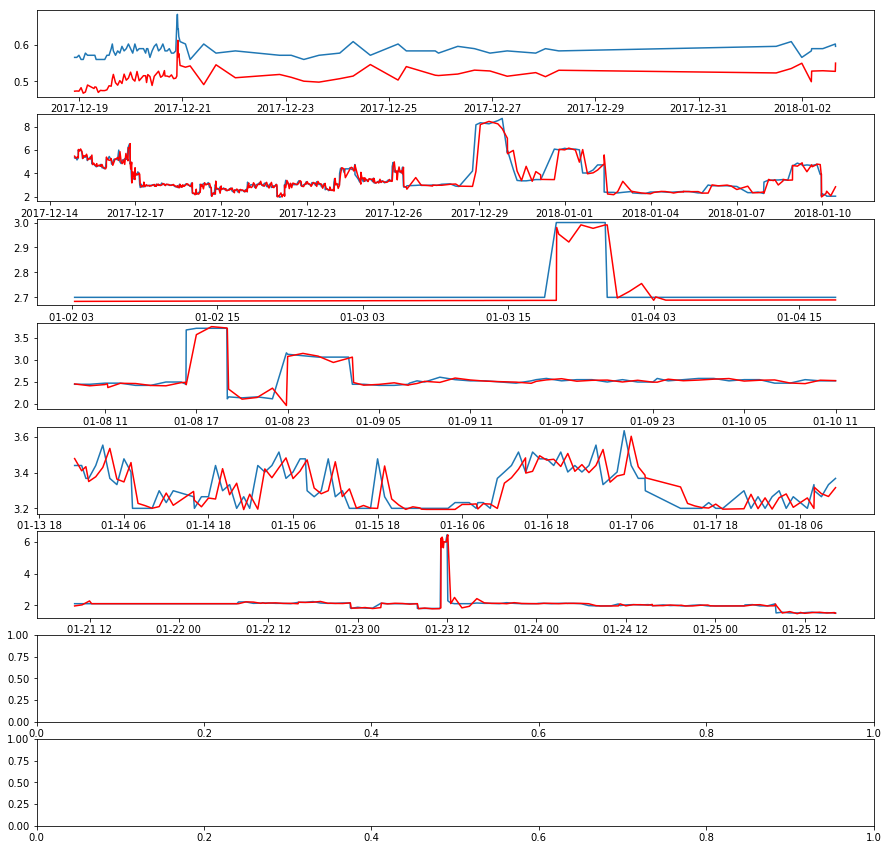

In [59]:

fig, ax = plt.subplots(8, ncols=1,figsize=(15, 15))

#for row in ax:
#    for col in row:
#        col.plot(osis[0])
        
for r in range(0,len(ax)):
    #ax[r].plot(osis[r])
    results = get_results(osis[r])
    ax[r].plot(results['Test'])
    ax[r].plot(results['Pred'], color='red')

plt.show()

In [39]:
ax[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB1692BC50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001CB16666F98>], dtype=object)

In [9]:


#axes = plt.gca()
#axes.set_ylim([0,45])

#sns.set_style("darkgrid")

#plt.plot(osi)
#plt.xticks(rotation=60)

#plt.show()

In [10]:


#autocorrelation_plot(osi)
#axes = plt.gca()
#axes.set_ylim([-1,1])
#plt.show()

#plot_acf(osi)
#plt.show()


C:\Users\david\AppData\Local\conda\conda\envs\data\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [54]:
def get_results(samp):
    size = int(len(samp) * .66)
    train, test = samp[0:size], samp[size:len(samp)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return pd.DataFrame({'Test':test,'Pred':predictions})

In [14]:

samp = osi[0:200]

size = int(len(samp) * .66)
train, test = samp[0:size], samp[size:len(osi)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat,obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

output = pd.DataFrame({'Test':test,'Pred':predictions})
output




predicted=0.473031, expected=0.600000
predicted=0.435506, expected=0.600000
predicted=0.484346, expected=0.606061
predicted=0.490237, expected=0.618557
predicted=0.507164, expected=0.612245
predicted=0.496846, expected=0.600000
predicted=0.486189, expected=0.600000
predicted=0.488338, expected=0.600000
predicted=0.487888, expected=0.606061
predicted=0.497575, expected=0.612245
predicted=0.504861, expected=0.600000
predicted=0.490010, expected=0.600000
predicted=0.493031, expected=0.600000
predicted=0.492916, expected=0.606061
predicted=0.499850, expected=0.600000
predicted=0.495901, expected=0.600000
predicted=0.495862, expected=0.600000
predicted=0.496694, expected=0.560000
predicted=0.453602, expected=0.560000
predicted=0.461896, expected=0.571429
predicted=0.472781, expected=0.565657
predicted=0.464173, expected=0.560000
predicted=0.465431, expected=0.577320
predicted=0.479662, expected=0.571429
predicted=0.469619, expected=0.560000
predicted=0.461746, expected=0.571429
predicted=0.

,Pred,Test
RECORDED_TIME,,
2017-12-17 19:17:00,[0.473031481042],0.600000
2017-12-17 20:00:00,[0.435505994406],0.600000
2017-12-17 21:00:00,[0.484346310378],0.606061
2017-12-17 22:00:00,[0.490237186722],0.618557
2017-12-17 23:00:00,[0.507163589867],0.612245
2017-12-17 23:31:00,[0.496845526002],0.600000
2017-12-17 23:35:00,[0.486188709916],0.600000
2017-12-18 00:00:00,[0.488337879509],0.600000
2017-12-18 01:00:00,[0.487888301195],0.606061
